Array Size: 100
Best Case Time: 0.005729 seconds
Worst Case Time: 0.003138 seconds
Average Case Time: 0.000503 seconds
----------------------------------------
Array Size: 200
Best Case Time: 0.018895 seconds
Worst Case Time: 0.013068 seconds
Average Case Time: 0.001366 seconds
----------------------------------------
Array Size: 300
Best Case Time: 0.052749 seconds
Worst Case Time: 0.038687 seconds
Average Case Time: 0.001682 seconds
----------------------------------------
Array Size: 400
Best Case Time: 0.158121 seconds
Worst Case Time: 0.057314 seconds
Average Case Time: 0.002882 seconds
----------------------------------------
Array Size: 500
Best Case Time: 0.128039 seconds
Worst Case Time: 0.092593 seconds
Average Case Time: 0.003470 seconds
----------------------------------------


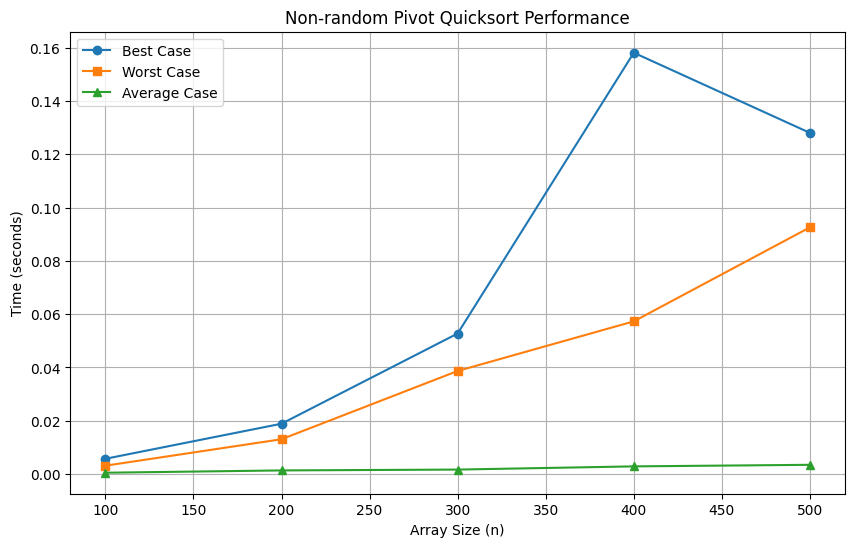

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import time

def partition(arr, low, high):
    pivot = arr[high]
    i = low - 1
    for j in range(low, high):
        if arr[j] < pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
    arr[i+1], arr[high] = arr[high], arr[i+1]
    return i + 1

def quicksort_non_random(arr, low, high):
    if low < high:
        pi = partition(arr, low, high)
        quicksort_non_random(arr, low, pi-1)
        quicksort_non_random(arr, pi+1, high)

def benchmark_quicksort(array_sizes):
    best_case_times = []
    worst_case_times = []
    average_case_times = []

    for n in array_sizes:
        # Best case: Array is already sorted
        best_case_arr = np.arange(n)
        start_time = time.time()
        quicksort_non_random(best_case_arr, 0, n-1)
        best_case_time = time.time() - start_time
        best_case_times.append(best_case_time)

        # Worst case: Array is sorted in reverse order
        worst_case_arr = np.arange(n, 0, -1)
        start_time = time.time()
        quicksort_non_random(worst_case_arr, 0, n-1)
        worst_case_time = time.time() - start_time
        worst_case_times.append(worst_case_time)

        # Average case: Array elements are randomly distributed
        average_case_arr = np.random.randint(0, n, size=n)
        start_time = time.time()
        quicksort_non_random(average_case_arr, 0, n-1)
        average_case_time = time.time() - start_time
        average_case_times.append(average_case_time)

        # Print the times for this array size
        print(f"Array Size: {n}")
        print(f"Best Case Time: {best_case_time:.6f} seconds")
        print(f"Worst Case Time: {worst_case_time:.6f} seconds")
        print(f"Average Case Time: {average_case_time:.6f} seconds")
        print("-" * 40)

    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(array_sizes, best_case_times, label='Best Case', marker='o')
    plt.plot(array_sizes, worst_case_times, label='Worst Case', marker='s')
    plt.plot(array_sizes, average_case_times, label='Average Case', marker='^')
    plt.xlabel('Array Size (n)')
    plt.ylabel('Time (seconds)')
    plt.title('Non-random Pivot Quicksort Performance')
    plt.legend()
    plt.grid(True)
    plt.show()

# Define the array sizes for benchmarking
array_sizes = [100, 200, 300, 400, 500]
benchmark_quicksort(array_sizes)


In [ ]:
# 3. Mathematical Derivation of the Average Runtime Complexity of the Non-random Pivot Version of Quicksort

# Quicksort's average-case time complexity is often derived assuming that all elements are distinct and that any element is equally likely to be chosen as the pivot. For the non-random pivot version (choosing the last element as the pivot), the analysis is slightly more complex due to the fixed pivot position, but the average case can still be analyzed by considering the probability distribution of pivot positions over all recursive calls.

# The average-case time complexity of Quicksort, \(T(n)\), can be expressed as follows, assuming a good balance of partitions:

# \[ T(n) = 2T\left(\frac{n}{2}\right) + \Theta(n) \]

# This recurrence relation arises because, on average, the pivot divides the array into two equal parts, and then we need to sort both halves. The \(\Theta(n)\) term represents the linear time required to partition the array around the pivot.

# Using the Master Theorem or simply solving the recurrence, we find that:

# \[ T(n) = \Theta(n \log n) \]

# This \(\Theta(n \log n)\) complexity is due to the fact that each level of recursion operates on a total of \(n\) elements, and the depth of the recursion tree is \(\log n\), assuming a perfectly balanced partition every time. In reality, partitions are not always perfectly balanced, but over a large number of inputs, the average case tends to be logarithmic, hence the average-case time complexity of \(\Theta(n \log n)\).

# It's important to note that this derivation assumes a somewhat idealized scenario with balanced partitions. In practice, the choice of pivot and the distribution of the input data can significantly affect performance. The worst-case scenario, with a time complexity of \(O(n^2)\), occurs when the pivot is the smallest or largest element of the array in every partition step, leading to highly unbalanced partitions.